In [1]:
import sqlite3
import pandas as pd
import numpy as np
import time
from utils import *
from ReactNode import ReactNode
from ChemNode import ChemNode
from ChemNode import ChemNode
from MCTS import MCTS
from tree_utils import *

conn = sqlite3.connect('buyable.db')
buyable = conn.cursor()
retrobiocat = pd.read_pickle("data/final_test_retrobiocat.pkl")
analyzer = Retrosim()

smile = "C#C[C@]1([C@H](C[C@@H](O1)N2C=NC3=C(N=C(N=C32)F)N)O)CO"
root = ChemNode(smile, 0, None, buyable, retrobiocat, analyzer, None)

mcts = MCTS(root)

start = time.time()
mcts.MCTS(1000)
print("Time taken (s): ", time.time()-start)

for react in root.reactions:
    print(f'Reaction name: {react.reaction_name}, Score: {react.get_mcts_value()}')
    for precursor in react.precursors:
        print(f'Chem {precursor.smiles}, Score: {precursor.score}, visits: {precursor.visits}, solution: {precursor.solution}')
    print(" ")
    
prune_tree(root)
paths = generate_paths(root)

/home/rjsilves/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/rjsilves/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
100%|██████████| 1000/1000 [18:53<00:00,  1.13s/it]


Time taken (s):  1133.1586375236511
Reaction name: Ester hydrolysis (OH), Score: 1.1639138607487411
Chem C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1OC(=O)CC, Score: 0.95, visits: 12, solution: False
 
Reaction name: Phosphate hydrolysis, Score: 1.1399950411673472
Chem C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1OP(=O)(O)O, Score: 1.9, visits: 14, solution: False
 
Reaction name: Phosphate hydrolysis, Score: 1.1399950411673472
Chem C#C[C@]1(COP(=O)(O)O)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O, Score: 1.9, visits: 14, solution: False
 
Reaction name: PNP (Incorporated from RDEnzyme), Score: 1.1682876409052687
Chem C#C[C@]1(CO)O[C@H](OP(=O)([O-])[O-])C[C@@H]1O, Score: 7.2781993750000025, visits: 581, solution: True
Chem Nc1nc(F)nc2[nH]cnc12, Score: 1.0, visits: 1, solution: True
 
Reaction name: Aldehyde reduction, Score: 1.1329814931019677
Chem C#C[C@]1(C=O)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O, Score: 0.0, visits: 11, solution: False
 
Reaction name: Ketone reduction, Score: 1.163

In [2]:
root.solution

False

There are 3 paths found.


Enter a number (1-3) to explore a path or type 'exit' to quit:  1


BRANCH 0:
-----------------
Chem: C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O
Reaction 0: PNP (Incorporated from RDEnzyme)
SPLIT: Chem1: C#C[C@]1(CO)O[C@H](OP(=O)([O-])[O-])C[C@@H]1O, Chem2: Nc1nc(F)nc2[nH]cnc12

Reaction 1: PPM (Incorporated from RDEnzyme)
Chem: C#C[C@]1(COP(=O)([O-])[O-])OC(O)C[C@@H]1O
Reaction 2: Hemiacetal closure (Incorporated from RDEnzyme)
SPLIT: Chem1: C#C[C@](O)(C=O)COP(=O)([O-])[O-], Chem2: CC=O

Reaction 3: Primary alcohol oxidation
Chem: C#C[C@](O)(CO)COP(=O)([O-])[O-]
Reaction 4: Phosphate transferase (Incorporated from RDEnzyme)
Chem: C#CC(O)(CO)CO
BUYABLE

BRANCH 1:
-----------------
Chem: CC=O
BUYABLE

BRANCH 2:
-----------------
Chem: Nc1nc(F)nc2[nH]cnc12
BUYABLE


This is path 1 of 3
--------------------
Target Compound: C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


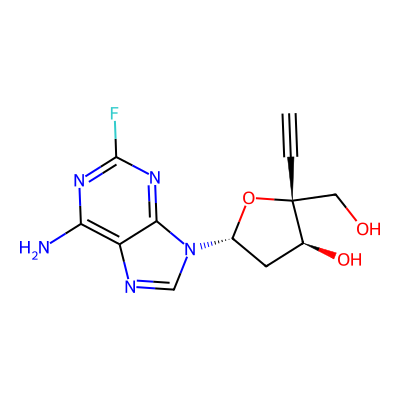


These are the buyable compounds needed for this pathway:
Buyable Compound 1: CC=O


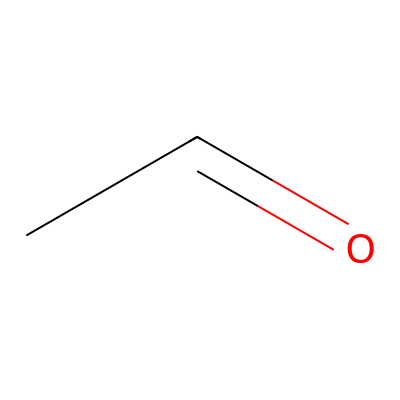

Buyable Compound 2: C#CC(O)(CO)CO


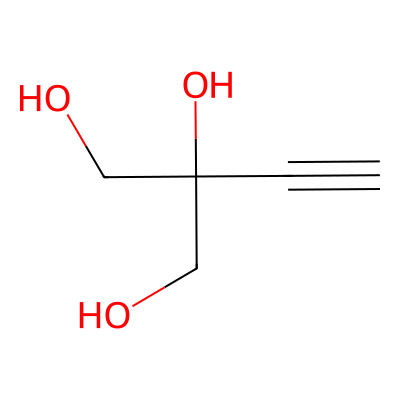

Buyable Compound 3: Nc1nc(F)nc2[nH]cnc12


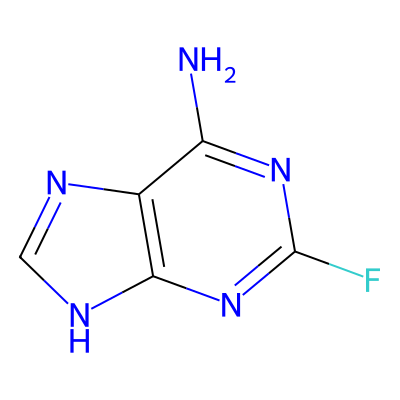


Reaction 1: PNP (Incorporated from RDEnzyme)
Reaction SMILES: C#C[C@]1(CO)O[C@H](OP(=O)([O-])[O-])C[C@@H]1O.Nc1nc(F)nc2[nH]cnc12>>C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


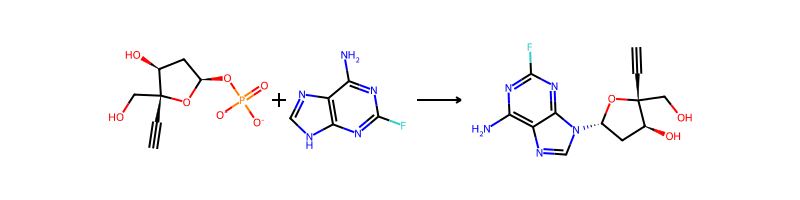


Reaction 2: PPM (Incorporated from RDEnzyme)
Reaction SMILES: C#C[C@]1(COP(=O)([O-])[O-])OC(O)C[C@@H]1O>>C#C[C@]1(CO)O[C@H](OP(=O)([O-])[O-])C[C@@H]1O


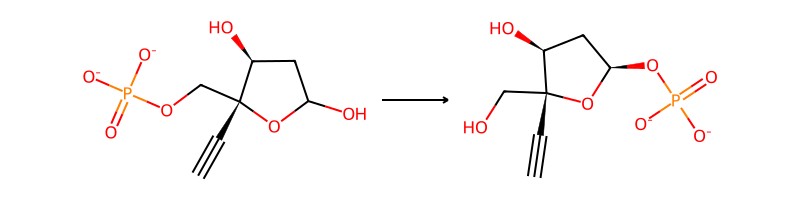


Reaction 3: Hemiacetal closure (Incorporated from RDEnzyme)
Reaction SMILES: C#C[C@](O)(C=O)COP(=O)([O-])[O-].CC=O>>C#C[C@]1(COP(=O)([O-])[O-])OC(O)C[C@@H]1O


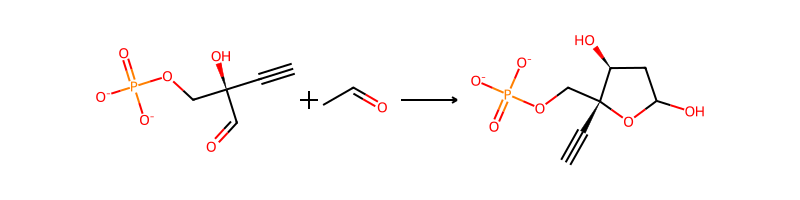


Reaction 4: Primary alcohol oxidation
Reaction SMILES: C#C[C@](O)(CO)COP(=O)([O-])[O-]>>C#C[C@](O)(C=O)COP(=O)([O-])[O-]


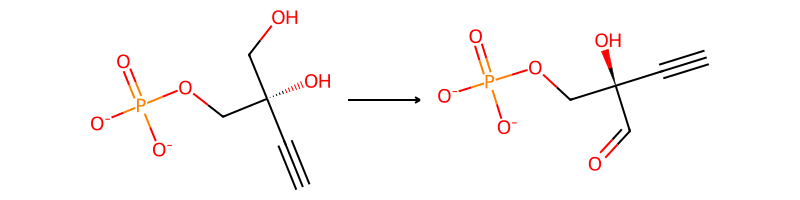


Reaction 5: Phosphate transferase (Incorporated from RDEnzyme)
Reaction SMILES: C#CC(O)(CO)CO>>C#C[C@](O)(CO)COP(=O)([O-])[O-]


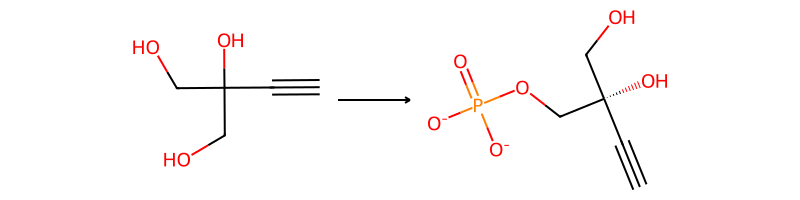

-------------------------------------------------------------------------------------------------------------------------------------------------


Enter a number (1-3) to explore a path or type 'exit' to quit:  2


BRANCH 0:
-----------------
Chem: C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O
Reaction 0: PNP (Incorporated from RDEnzyme)
Chem: C#C[C@]1(CO)O[C@H](OP(=O)([O-])[O-])C[C@@H]1O
Reaction 1: PPM (Incorporated from RDEnzyme)
Chem: C#C[C@]1(COP(=O)([O-])[O-])OC(O)C[C@@H]1O
Reaction 2: Hemiacetal closure (Incorporated from RDEnzyme)
Chem: C#C[C@](O)(C=O)COP(=O)([O-])[O-]
Reaction 3: Primary alcohol oxidation
Chem: C#C[C@](O)(CO)COP(=O)([O-])[O-]
Reaction 4: Phosphorylation
Chem: C#CC(O)(CO)CO
BUYABLE


This is path 2 of 3
--------------------
Target Compound: C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


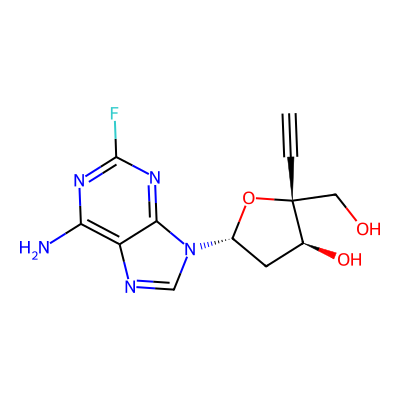


These are the buyable compounds needed for this pathway:
Buyable Compound 1: C#CC(O)(CO)CO


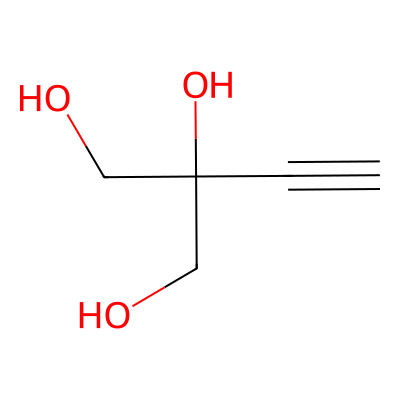


Reaction 1: PNP (Incorporated from RDEnzyme)
Reaction SMILES: C#C[C@]1(CO)O[C@H](OP(=O)([O-])[O-])C[C@@H]1O>>C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


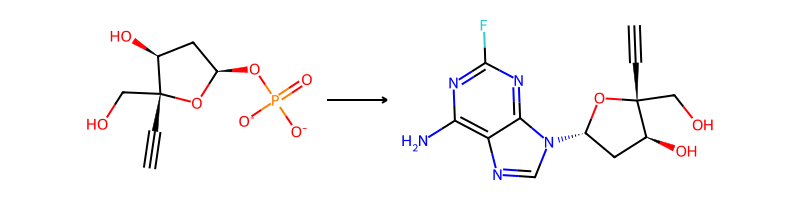


Reaction 2: PPM (Incorporated from RDEnzyme)
Reaction SMILES: C#C[C@]1(COP(=O)([O-])[O-])OC(O)C[C@@H]1O>>C#C[C@]1(CO)O[C@H](OP(=O)([O-])[O-])C[C@@H]1O


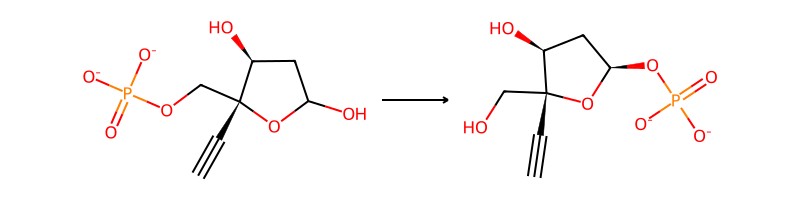


Reaction 3: Hemiacetal closure (Incorporated from RDEnzyme)
Reaction SMILES: C#C[C@](O)(C=O)COP(=O)([O-])[O-]>>C#C[C@]1(COP(=O)([O-])[O-])OC(O)C[C@@H]1O


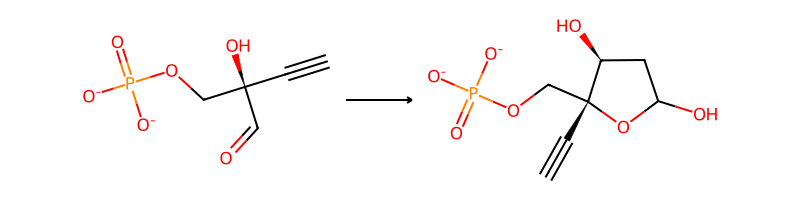


Reaction 4: Primary alcohol oxidation
Reaction SMILES: C#C[C@](O)(CO)COP(=O)([O-])[O-]>>C#C[C@](O)(C=O)COP(=O)([O-])[O-]


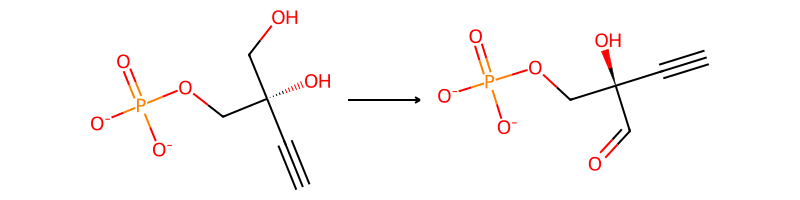


Reaction 5: Phosphorylation
Reaction SMILES: C#CC(O)(CO)CO>>C#C[C@](O)(CO)COP(=O)([O-])[O-]


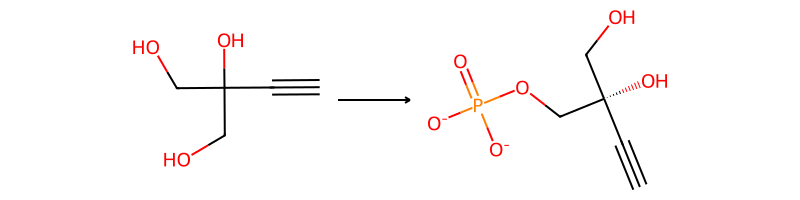

-------------------------------------------------------------------------------------------------------------------------------------------------


Enter a number (1-3) to explore a path or type 'exit' to quit:  3


BRANCH 0:
-----------------
Chem: C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O
Reaction 0: PNP
Chem: Nc1nc(F)nc2[nH]cnc12
BUYABLE


This is path 3 of 3
--------------------
Target Compound: C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


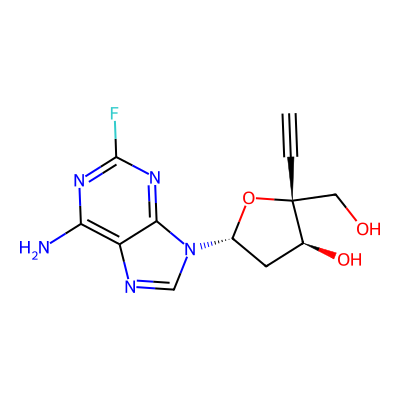


These are the buyable compounds needed for this pathway:
Buyable Compound 1: Nc1nc(F)nc2[nH]cnc12


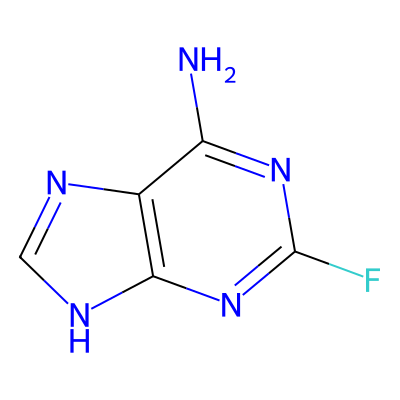


Reaction 1: PNP
Reaction SMILES: Nc1nc(F)nc2[nH]cnc12>>C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


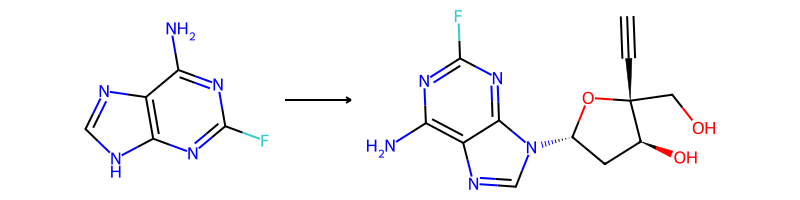

-------------------------------------------------------------------------------------------------------------------------------------------------


Enter a number (1-3) to explore a path or type 'exit' to quit:  exit


Program has been terminated.


In [3]:
print("There are " + str(len(paths)) + " paths found.")
while True:
    user_input = input(f"Enter a number (1-{len(paths)}) to explore a path or type 'exit' to quit: ")

    if user_input.lower() == "exit":
        print("Program has been terminated.")
        break

    try:
        num = int(user_input)
        if 1 <= num <= len(paths):
            path_explorer(paths[num-1])
            path_explorer3(paths[num - 1], num, len(paths))
        else:
            print(f"Invalid input. Please enter a number between 1 and {len(paths)}.")
    except ValueError:
        print("Invalid input. Please enter a valid integer or type 'exit' to quit.")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")